## OBARAKPOR TEGA
## 202120109
## CODE FOR DATA SCIENCE CENSUS PROJECT

In [1]:
# importing necessary libraries
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data set
data = pd.read_csv('census02.csv')
data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,None,Christian
1,2,Kaur Drive,Hollie,West,79.0,Head,Single,Female,Retired Dealer,None,Christian
2,3,Kaur Drive,Joseph,Hall,55.0,Head,Single,Male,Fast food restaurant manager,None,Christian
3,4,Kaur Drive,Gregory,Cox,35.0,Head,Single,Male,Housing manager/officer,None,None
4,5,Kaur Drive,Lydia,Jones,42.0,Head,Single,Female,Unemployed,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
10113,1,St.John Haven,Patrick,Morgan,9.0,Son,NaN,Male,Student,None,NaN
10114,1,St.John Haven,Caroline,Morgan,6.0,Daughter,NaN,Female,Student,None,NaN
10115,1,St.John Haven,Benjamin,Morgan,2.0,Son,NaN,Male,Child,None,NaN
10116,1,St.John Haven,Kate,Whitehead,51.0,Sibling,Single,Female,Food technologist,None,Christian


In [3]:
#checking columns
data.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

# DATA CLEANING

### Checking for duplicate data and dropping them if any

In [4]:
duplicates=data.duplicated()
data[duplicates]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7729,45,O'Connor Crossroad,Scott,Cook,5.0,Son,NaN,Male,Student,None,NaN


In [5]:
# dropping the duplicate data
data.drop_duplicates(inplace = True)

In [6]:
#checking data types
data.dtypes

House Number                       int64
Street                            object
First Name                        object
Surname                           object
Age                              float64
Relationship to Head of House     object
Marital Status                    object
Gender                            object
Occupation                        object
Infirmity                         object
Religion                          object
dtype: object

In [7]:
#checking for nan values
data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2483
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2540
dtype: int64

### Null values will be dealt with during the cleaning of the respective columns

## CLEANING AGE COLUMN

In [8]:
#Checking for unique values in the age column to better understand why it is a float dtype
data["Age"].unique()

array([ 77.        ,  79.        ,  55.        ,  35.        ,
        42.        ,   3.        ,  80.        ,  12.        ,
        76.        ,  46.        ,  27.        ,   2.        ,
        54.        ,   1.        ,  70.        ,  72.        ,
        34.        ,  68.        ,  40.        ,  37.        ,
        48.        ,  38.        ,   8.        ,  75.        ,
        67.        ,  89.        ,  88.        ,  64.        ,
         0.        ,  49.        ,  22.        ,  59.        ,
        36.        ,  44.        ,  60.        ,  11.        ,
        23.        ,  29.        ,  58.        ,  50.        ,
        20.        ,  21.        ,  17.        ,  14.        ,
        33.        ,  10.        ,  31.        ,  47.        ,
        16.        ,  19.        ,  41.        ,  43.        ,
         5.        ,  57.        ,   9.        ,  28.        ,
        32.        ,  45.        ,  53.        ,  15.        ,
        39.        ,  30.        ,  78.        ,  63.  

### Cleaning the Age column by converting all values to int, thereby rounding down the float values to the nearest int to represent the true ages of the individuals

In [9]:
#converting to int
data['Age'] = data['Age'].astype(int)

In [10]:
#confirming unique values
data["Age"].unique()

array([ 77,  79,  55,  35,  42,   3,  80,  12,  76,  46,  27,   2,  54,
         1,  70,  72,  34,  68,  40,  37,  48,  38,   8,  75,  67,  89,
        88,  64,   0,  49,  22,  59,  36,  44,  60,  11,  23,  29,  58,
        50,  20,  21,  17,  14,  33,  10,  31,  47,  16,  19,  41,  43,
         5,  57,   9,  28,  32,  45,  53,  15,  39,  30,  78,  63,  51,
        52,  74,  18,  66,  69,  83,  86,  25,  24,  62,  13,  81,   4,
        73,   6,  61,  26,  56,  65,   7,  82,  84,  87,  92,  90,  71,
       105,  85, 106,  99,  97,  96, 103, 104, 108,  91, 102,  94,  95,
        98, 101, 109, 111, 120,  93])

## Cleaning the Gender column

In [11]:
# checking the number of unique values in the gender column
data["Gender"].value_counts()

Female    5269
Male      4847
             1
Name: Gender, dtype: int64

### The unallocated gender would be located along with the neighboring rows to find any relationship that could provide insight as to the missing value

In [12]:
# unallocated gender cleaning
data.loc[data['Gender'] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
273,7,Kraken Road,Dale,Powell,79,Head,Married,,Retired TEFL teacher,None,None


In [13]:
# since the entry is for a married person, we look at neighbouring rows if we can figure out their gender
print(data.iloc[271:275])

     House Number       Street First Name Surname  Age  \
271             6  Kraken Road      Garry   Bryan   38   
272             6  Kraken Road     Hollie   Bryan   38   
273             7  Kraken Road       Dale  Powell   79   
274             7  Kraken Road    Jessica  Powell   78   

    Relationship to Head of House Marital Status  Gender  \
271                          Head        Married    Male   
272                          Wife        Married  Female   
273                          Head        Married           
274                          Wife        Married  Female   

                        Occupation Infirmity Religion  
271                     Unemployed      None     None  
272            Mechanical engineer      None     None  
273           Retired TEFL teacher      None     None  
274  Retired Journalist, newspaper      None     None  


### Neighboring rows indicate Dale Powell is the husband to Jessica Powell it can therefore be deduced that he is male so his gender would be assigned accordingly.

In [14]:
# Assigning male gender to Dale Powell
data['Gender'] = data['Gender'].replace(" ", "Male")

In [15]:
#Confirming Gender column is totally clean
data["Gender"].value_counts()

Female    5269
Male      4848
Name: Gender, dtype: int64

## Cleaning the Religion column

In [16]:
#checking unique values
data["Religion"].value_counts()

None         3454
Christian    2135
Catholic     1093
Methodist     628
Muslim        142
Sikh           68
Jewish         47
Agnostic        2
                2
Pagan           1
Bahai           1
Undecided       1
Sith            1
Nope            1
Jedi            1
Name: Religion, dtype: int64

### 2541 Nan values had already been noticed earlier and further inspection now also shows some strange values Jedi, Sith and Nope which arent actual religions. Jedi being a starwars reference, Sith probably being a typographical error for Sikh(Sikhism) and nope probably indicating None. 

### There is no logical approach to assigning religion because it is faith based and independent, and it is not uncommon for people in the same household to practice different religions. all null values would be changed to Not Available creating a clear distinction between not available and None as those who filled none showed a clear indication of no religious affiliations. Undecided would also be changed to Not available

In [17]:
# reassigning wrong inputs as necessary
data['Religion'].fillna('Not Available', inplace=True)
data['Religion'] = data['Religion'].replace(" ", "Not Available")
data['Religion'] = data['Religion'].replace("Sith", "Sikh")
data['Religion'] = data['Religion'].replace("Nope", "None")
data['Religion'] = data['Religion'].replace("Jedi", "Not Available")
data['Religion'] = data['Religion'].replace("Undecided", "Not Available")

In [18]:
# confirming Religion column is totally clean
data["Religion"].value_counts()

None             3455
Not Available    2544
Christian        2135
Catholic         1093
Methodist         628
Muslim            142
Sikh               69
Jewish             47
Agnostic            2
Pagan               1
Bahai               1
Name: Religion, dtype: int64

# Cleaning Marital Status Column

### Earlier inspection for nan values in the dataset showed 2483 nan values in the Marital Status column. A quick overview of those nan values would be done to try to identify any unique collective features

In [19]:
#inspecting null values in the marital status column
data[data['Marital Status'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5,5,Kaur Drive,Francis,Jones,3,Son,NaN,Male,Child,None,Not Available
7,6,Kaur Drive,Ruth,Godfrey,12,Granddaughter,NaN,Female,Student,None,Not Available
11,9,Kaur Drive,Samantha,Sheppard-Dean,2,Daughter,NaN,Female,Child,None,Not Available
14,11,Kaur Drive,Billy,Wilkinson,3,Son,NaN,Male,Child,None,Not Available
15,11,Kaur Drive,Mathew,Wilkinson,1,Son,NaN,Male,Child,None,Not Available
...,...,...,...,...,...,...,...,...,...,...,...
10111,1,St.John Haven,Jill,Johnson,13,Daughter,NaN,Female,Student,None,Not Available
10112,1,St.John Haven,Max,Morgan,10,Son,NaN,Male,Student,None,Not Available
10113,1,St.John Haven,Patrick,Morgan,9,Son,NaN,Male,Student,None,Not Available
10114,1,St.John Haven,Caroline,Morgan,6,Daughter,NaN,Female,Student,None,Not Available


### The Overview indicates that the majority of the nan values are for minors below the marrying age of 18 years (Gov.uk, 2023). this could be indicative of parents or head of house filling out census information for their minors and leaving the marital status column blank since it is inapplicable 

In [20]:
# confirmation that all Nan values belong to individuals below 18 years.
marital_subset = data[(data['Marital Status'].isnull()) & (data['Age'] < 18)]
print("Number of people with NaN values in Marital Status and age below 18:", len(marital_subset))

Number of people with NaN values in Marital Status and age below 18: 2483


### This confirms that all nan values are below 18 years as the total tallies with the number of Nan values in the column, so all of them would be changed to Ineligible instead of Single, creating a clear distinction between single adults and ineligible minors

In [21]:
# Converting nan underage to ineligible
data.loc[data['Age'] < 18, 'Marital Status'] = data.loc[data['Age'] < 18, 'Marital Status'].fillna('Ineligible')

In [22]:
# confirming nan values have been cleared
data[data['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Further inspection to be sure there are no married values under 18 years

In [23]:
#extracting married respondents under 18 years
married_u18 = data[(data['Age'] < 18) & (data['Marital Status'] == 'Married')]
married_u18

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9582,18,Estuary Roads,Marie,Patterson,17,Head,Married,Female,Student,None,Not Available


In [24]:
#checking neighboring rows
print(data.iloc[9580:9585])

      House Number         Street First Name    Surname  Age  \
9581            17  Estuary Roads        Ben    Jackson   87   
9582            18  Estuary Roads      Marie  Patterson   17   
9583            18  Estuary Roads    Cameron  Patterson   20   
9584            18  Estuary Roads    Vanessa  Patterson    0   
9585            18  Estuary Roads    Shannon   Fletcher   43   

     Relationship to Head of House Marital Status  Gender  \
9581                       Husband        Married    Male   
9582                          Head        Married  Female   
9583                       Husband        Married    Male   
9584                      Daughter     Ineligible  Female   
9585                        Lodger         Single  Female   

                            Occupation Infirmity       Religion  
9581  Retired Arts development officer      None           None  
9582                           Student      None  Not Available  
9583                University Student      None  

### The marriage between Marie Patterson and Cameron Patterson seems to be indicative of an illegal marriage as 18 is the legal marrying age. I considered dropping both values from the dataset, but Cameron Patterson is a University Student and the few university students in the dataset would be crucial in further analysis for commuting or bulding a univeristy, so i opted to void the marriage and input Cameron Patterson as Single and Marie Patterson as Inelligible as keeping them would have less impact on the Marriage rate that the impact dropping them would have on the Commuting and University analysis.

In [25]:
#reassigning marital status, and the relationship to the head of house column as well
data.loc[9582, 'Marital Status'] = 'Ineligible'
data.loc[9583, 'Marital Status'] = 'Single'
data.loc[9583, 'Relationship to Head of House'] = 'None'


In [26]:
# Confirming changes
print(data.loc[[9582, 9583]])

      House Number         Street First Name    Surname  Age  \
9582            18  Estuary Roads      Marie  Patterson   17   
9583            18  Estuary Roads    Cameron  Patterson   20   

     Relationship to Head of House Marital Status  Gender          Occupation  \
9582                          Head     Ineligible  Female             Student   
9583                          None         Single    Male  University Student   

     Infirmity       Religion  
9582      None  Not Available  
9583      None           None  


### Confirming if there are other unique values in the marital status column

In [27]:
# Checking unique values in the Marital status column
data["Marital Status"].value_counts()

Single        3738
Married       2671
Ineligible    2484
Divorced       871
Widowed        352
                 1
Name: Marital Status, dtype: int64

### The blank column would be located and the neighboring rows would be explored for any insight towards assigning the marital status of the missing value

In [28]:
# locting the blank value
data.loc[data["Marital Status"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1941,2,Williams View,Katie,Alexander,66,Head,,Female,Leisure centre manager,None,Methodist


In [29]:
# locating neighboring rows
print(data.iloc[1939:1946])

      House Number         Street First Name    Surname  Age  \
1939             1  Williams View        Ben      Singh   35   
1940             1  Williams View    Eleanor      Singh    2   
1941             2  Williams View      Katie  Alexander   66   
1942             2  Williams View   Geoffrey  Alexander   64   
1943             3  Williams View      Grace   Campbell   88   
1944             4  Williams View       Beth      Adams   54   
1945             5  Williams View    Raymond      Noble   32   

     Relationship to Head of House Marital Status  Gender  \
1939                       Husband        Married    Male   
1940                      Daughter     Ineligible  Female   
1941                          Head                 Female   
1942                       Husband        Married    Male   
1943                          Head        Widowed  Female   
1944                          Head       Divorced  Female   
1945                          Head         Single    Male   

### Information from neighboring rows indicates that Katie Alexander is currently married to  Geoffrey Alexander, as they share the same last name and live together, while his status is currently set to married. So her Marital status would be filled as Married

In [30]:
# filling the missing status as married
data['Marital Status'] = data['Marital Status'].replace(" ", "Married")

In [31]:
#confirming clean marital status column
data["Marital Status"].value_counts()

Single        3738
Married       2672
Ineligible    2484
Divorced       871
Widowed        352
Name: Marital Status, dtype: int64

# Cleaning the Infirmity column

In [32]:
# Examining the different values in the column
data["Infirmity"].value_counts()

None                   10033
Physical Disability       19
Blind                     15
Deaf                      13
Disabled                  10
                          10
Unknown Infection         10
Mental Disability          7
Name: Infirmity, dtype: int64

In [33]:
#locating the blank values
data.loc[data["Infirmity"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
502,29,Kraken Drive,Emily,Coates,0,Daughter,Ineligible,Female,Child,,Not Available
1046,39,Blake Villages,Donald,Miller,43,Husband,Married,Male,"Administrator, local government",,None
1641,18,O'Connor Crescent,Nicola,Clark,40,Head,Married,Female,"Lecturer, further education",,None
2179,56,Summer Viaduct,Mathew,French,32,Head,Married,Male,Mechanical engineer,,None
2453,20,Crown Branch,Lynn,Morgan,3,Daughter,Ineligible,Female,Child,,Not Available
3249,6,Davey Underpass,Molly,Ward-Jones,6,Daughter,Ineligible,Female,Student,,Not Available
4802,25,Rose Street,Rachael,Lewis,46,Wife,Married,Female,Marketing executive,,None
5418,76,Atkins Road,Pauline,Stone,46,Cousin,Single,Female,Electrical engineer,,Christian
5900,156,Atkins Road,Liam,Roberts,21,Son,Single,Male,University Student,,None
9348,98,Iron Crescent,Ann,Walker,65,Head,Widowed,Female,"Designer, multimedia",,None


### The blank values indicates that the respondent has an infirmity but did not specify what, so these values would be changed to unknown infirmity. the Values for disabled would also be changed to unknown disablity

In [34]:
#filling blank values
data['Infirmity'] = data['Infirmity'].replace(" ", "Unknown Infirmity")
data['Infirmity'] = data['Infirmity'].replace("Disabled", "Unknown Disability")

In [35]:
# confirming clean infirmity column
data["Infirmity"].value_counts()

None                   10033
Physical Disability       19
Blind                     15
Deaf                      13
Unknown Disability        10
Unknown Infirmity         10
Unknown Infection         10
Mental Disability          7
Name: Infirmity, dtype: int64

# Cleaning the Occupation Column

In [36]:
# Checking for unique values in the Occupation column
data["Occupation"].value_counts()

Student                                 2013
University Student                       669
Unemployed                               615
Child                                    596
PhD Student                               27
                                        ... 
Retired Hospital pharmacist                1
Retired Designer, industrial/product       1
Retired Copy                               1
Retired Financial controller               1
Retired Conservator, furniture             1
Name: Occupation, Length: 1100, dtype: int64

In [37]:
# Checking for blank values in the occupation column
data.loc[data["Occupation"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### There doesn't seem to be anything wrong with the Occupation column. Further analysis and groupings would be done on a subdataset later on when analyzing employment trends

# Cleaning the Relationship to head of house column

In [38]:
#checking all the unique values in the column
data["Relationship to Head of House"].value_counts()

Head                3158
Son                 1804
Daughter            1789
Husband             1007
None                 763
Lodger               538
Wife                 322
Partner              296
Granddaughter        100
Grandson              97
Sibling               71
Cousin                40
Visitor               34
Step-Son              21
Adopted Son           20
Adopted Daughter      20
Step-Daughter         18
Neice                  9
Nephew                 7
                       2
Adopted Grandson       1
Name: Relationship to Head of House, dtype: int64

In [39]:
# finding the blank values
data.loc[data["Relationship to Head of House"] == " "]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6019,176,Atkins Road,Katie,Lewis-Jones,11,,Ineligible,Female,Student,None,Not Available
6495,39,Wilson Throughway,Scott,Martin,40,,Married,Male,"Designer, television/film set",None,None


In [40]:
# locating neighboring rows
print(data.iloc[6015:6021])
print(data.iloc[6492:6497])

      House Number       Street First Name      Surname  Age  \
6015           176  Atkins Road      Paige        Jones   56   
6016           176  Atkins Road      Garry        Jones   57   
6017           176  Atkins Road      Maria        Jones   16   
6018           176  Atkins Road        Tom  Lewis-Jones   12   
6019           176  Atkins Road      Katie  Lewis-Jones   11   
6020           177  Atkins Road        Ben      Lambert   38   

     Relationship to Head of House Marital Status  Gender  \
6015                          Head        Married  Female   
6016                       Husband        Married    Male   
6017                      Daughter     Ineligible  Female   
6018                           Son     Ineligible    Male   
6019                                   Ineligible  Female   
6020                          Head         Single    Male   

                        Occupation Infirmity       Religion  
6015                Radio producer      None           None  

### Inspection of neighboring rows indicate that Katie Lewis Jones is a female and the child of Paige and Garry Jones, so her value would be set to Daughter. Inspection of neighboring rows also indicate that Scot Martin is male and Married to Carol Martin living in the same address so his value would be changed to Husband

In [41]:
# changing the relationship as analyzed
data.loc[6019, 'Relationship to Head of House'] = 'Daughter'
data.loc[6495, 'Relationship to Head of House'] = 'Husband'

In [42]:
# confirming column has been cleaned
data["Relationship to Head of House"].value_counts()

Head                3158
Son                 1804
Daughter            1790
Husband             1008
None                 763
Lodger               538
Wife                 322
Partner              296
Granddaughter        100
Grandson              97
Sibling               71
Cousin                40
Visitor               34
Step-Son              21
Adopted Son           20
Adopted Daughter      20
Step-Daughter         18
Neice                  9
Nephew                 7
Adopted Grandson       1
Name: Relationship to Head of House, dtype: int64

## Because of the occurence of blank values across various columns, it is important to also check the first four columns for the same occurence

In [43]:
# checking the house number, street, first name and surname columns for blank values
data.loc[(data['Surname'] == ' ') | (data['First Name'] == ' ') |
         (data['Street'] == ' ') | (data['House Number'] == ' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1152,27,Whittaker Crescent,Harry,,26,Husband,Married,Male,Charity officer,None,None
4251,12,Clementine Forest,Lesley,,64,Wife,Married,Female,Forensic scientist,Deaf,Christian
8240,121,O'Connor Crossroad,Irene,,75,Daughter,Divorced,Female,Retired Magazine journalist,None,None


## Neighbouring cells would be examined to find relationships to fill the missing Surname values

In [44]:
#checking neighboring rows of the missing surname cells
print(data.iloc[1150:1155])
print(data.iloc[4249:4253])
print(data.iloc[8236:8243])

      House Number              Street First Name     Surname  Age  \
1150            26  Whittaker Crescent    Richard     Vaughan   13   
1151            27  Whittaker Crescent    Jessica       Clark   24   
1152            27  Whittaker Crescent      Harry               26   
1153            27  Whittaker Crescent     Damien  Khan-Clark    7   
1154            28  Whittaker Crescent     Kieran     Leonard   70   

     Relationship to Head of House Marital Status  Gender  \
1150                           Son     Ineligible    Male   
1151                          Head        Married  Female   
1152                       Husband        Married    Male   
1153                           Son     Ineligible    Male   
1154                          Head        Widowed    Male   

                          Occupation Infirmity       Religion  
1150                         Student      None  Not Available  
1151                         Dentist      None           None  
1152                

### Harry is Married to Jessica Clark, with  a son Damien Khan-Clark, so it is deduced his Surname is Clark. Lesley is Married to Anthony Hill with a son Jake Hill, so it is deduced that her surname is Hill. Irene is the daughter of Jordan and Marion Lewis, while her marital status is set to Divorced, there is the possibility that had taken up another name, but her surname is set to her maiden name Lewis regardless as this does not influence any of the analysis in any way.

In [45]:
# Assigning appropriate surname values
data.loc[1152, 'Surname'] = 'Clark'
data.loc[4251, 'Surname'] = 'Hill'
data.loc[8240, 'Surname'] = 'Lewis'

In [46]:
# confirming blank values have been corrected
data.loc[(data['Surname'] == ' ') | (data['First Name'] == ' ') |
         (data['Street'] == ' ') | (data['House Number'] == ' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# DATA ANALYSIS

## Examining the age distribution (age pyramid) of the population, to determine if it is growing or shrinking? also to find out if there will there be more retired aged people in the future, more school-aged children, more young people, etc

### An additional column called Age Range would be created to group people of the same 5 year age band in to one category

In [47]:
# Creating the Age Range band
bins = [-1, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 104, 109, 110, np.inf]
names = ['0-4', '5-9','10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', "60-64", '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99','100-104', '105-109', '110+' ]

data['Age Range'] = pd.cut(data['Age'], bins, labels=names)
data.head()
# Josh (2015)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
0,1,Kaur Drive,Douglas,Adams,77,Head,Widowed,Male,Retired Museum education officer,None,Christian,75-79
1,2,Kaur Drive,Hollie,West,79,Head,Single,Female,Retired Dealer,None,Christian,75-79
2,3,Kaur Drive,Joseph,Hall,55,Head,Single,Male,Fast food restaurant manager,None,Christian,55-59
3,4,Kaur Drive,Gregory,Cox,35,Head,Single,Male,Housing manager/officer,None,None,35-39
4,5,Kaur Drive,Lydia,Jones,42,Head,Single,Female,Unemployed,None,Catholic,40-44


In [48]:
# Grouping them together
grouped = data.groupby(['Age Range', 'Gender']).size().reset_index(name='count')
grouped.loc[grouped['Gender'] == 'Male', 'count'] = grouped.loc[grouped['Gender'] == 'Male', 'count'].apply(lambda x: x*-1)
grouped.head()


,Age Range,Gender,count
0,0-4,Female,273
1,0-4,Male,-323
2,5-9,Female,372
3,5-9,Male,-374
4,10-14,Female,356


### Plotting the Age Pyramid with, male and female Genders on opposite sides. The census data does not make provision for other genders and this would be discussed in the limitations section of the report

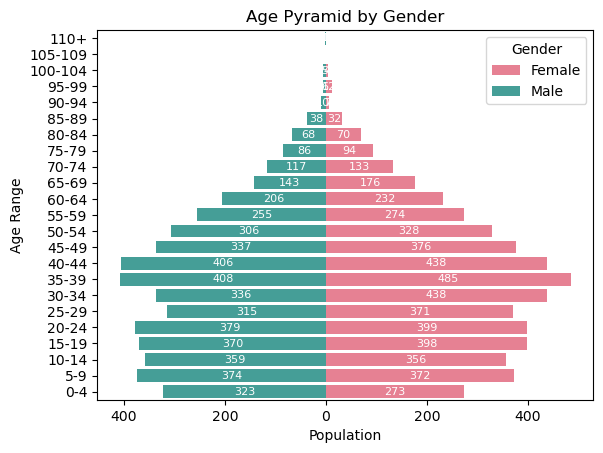

In [49]:
# plotting the age pyramid 
# Mariano (2020)
# modified using the matplotlib and seaborn documentation
pyramid = sns.barplot(data=grouped, x='count', y='Age Range', hue='Gender', dodge=False, palette='husl')
pyramid.invert_yaxis()
for bar in pyramid.containers:
    for value in bar:
        pyramid.text(value.get_width()/2 + value.get_x(), value.get_y()+value.get_height()/2, abs(int(value.get_width())), 
                     ha="center", va="center", color="white", fontsize=8)
pyramid.legend(title='Gender')
pyramid.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:.0f}'.format(abs(x))))
plt.xlabel('Population')
plt.ylabel('Age Range')
plt.title('Age Pyramid by Gender')
pyramid.get_figure().savefig("pyramid.png")

In [50]:
#Gender population
data["Gender"].value_counts()

Female    5269
Male      4848
Name: Gender, dtype: int64

### Early Insights from Age Pyramid analysis
Insights indicates a shrinking population as the pyramid shrinks significantly at the top indicating fast decrease in older age groups whuch could be as a result of migration of people after retirement.
The population of females is slightly higher than males.
School aged children would slighlty decrease in the near future as the count for ages below 15 is relatively lower.
If migration is minimal there will be shift towards an older population with decreasing birth rates in the future 

# Examining unemployment trends, to determine if certain ages more likely to be unemployed than others

In [51]:
# Examining the different values in the Occupation column
data['Occupation'].value_counts()

Student                                 2013
University Student                       669
Unemployed                               615
Child                                    596
PhD Student                               27
                                        ... 
Retired Hospital pharmacist                1
Retired Designer, industrial/product       1
Retired Copy                               1
Retired Financial controller               1
Retired Conservator, furniture             1
Name: Occupation, Length: 1100, dtype: int64

### Creating a subdatabase to examine unemployment trend is ideal as occupations would need to be grouped together as employed, retirees to retired and all classes of students as students

In [52]:
# Creating subdatabase
unemployment = data[["Age", "Occupation", "Gender"]]
unemployment

,Age,Occupation,Gender
0,77,Retired Museum education officer,Male
1,79,Retired Dealer,Female
2,55,Fast food restaurant manager,Male
3,35,Housing manager/officer,Male
4,42,Unemployed,Female
...,...,...,...
10113,9,Student,Male
10114,6,Student,Female
10115,2,Child,Male
10116,51,Food technologist,Female


In [53]:
# Grouping the values together
unemployment.loc[unemployment["Occupation"].str.contains("Student"), "Occupation"] = "Student"
unemployment.loc[unemployment["Occupation"].str.contains("Retired"), "Occupation"] = "Retired"
unemployment.loc[~unemployment['Occupation'].isin(['Student', 'Unemployed', 'Retired', "Child"]), 'Occupation'] = 'Employed'
unemployment["Occupation"].unique()
# Galli (2018)


array(['Retired', 'Employed', 'Unemployed', 'Child', 'Student'],
      dtype=object)

### Another age-group column would be created to categorize different age classes people in the labour age range (18-65), people in retirment age range (65+), and children below labour age range (below 18)

In [54]:
#Grouping the age brackets for unemployemnt analysis
#Josh (2015)
bins = [-1, 18, 25, 35, 45, 55, 65, np.inf]
names = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', "66+"]

unemployment['Employment Age Range'] = pd.cut(unemployment['Age'], bins, labels=names)
unemployment
#modified the code from the age pyramid
# Josh (2015)

,Age,Occupation,Gender,Employment Age Range
0,77,Retired,Male,66+
1,79,Retired,Female,66+
2,55,Employed,Male,46-55
3,35,Employed,Male,26-35
4,42,Unemployed,Female,36-45
...,...,...,...,...
10113,9,Student,Male,0-17
10114,6,Student,Female,0-17
10115,2,Child,Male,0-17
10116,51,Employed,Female,46-55


### To examine unemployment trend by age range, all groups not in the labour age range would be dropped from the chart (retired, students and Children )

In [55]:
#dropping underage and retired columns
unemployment = unemployment.drop(unemployment[(unemployment['Age'] <= 15) | (unemployment['Age'] > 65)| (unemployment['Occupation'] == 'Student')].index)

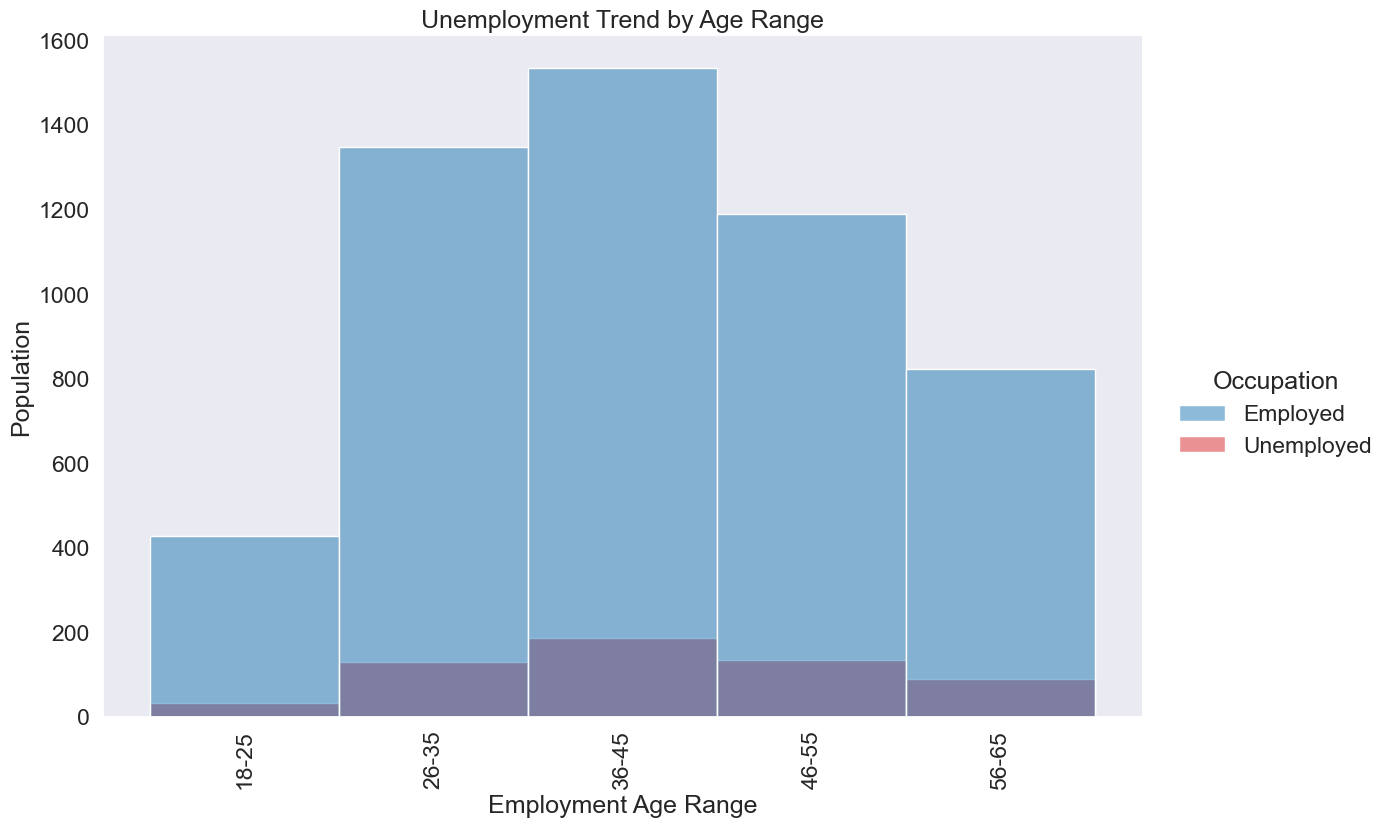

In [56]:
sns.set_style("whitegrid")
sns.set(font_scale=1.5)
palette = {
    'Employed': 'tab:blue',
    'Unemployed': 'tab:red',
}


w = sns.displot(data = unemployment, x="Employment Age Range", hue="Occupation", palette= palette, bins=50, height=8, aspect=1.5)
plt.xticks(rotation=90)
plt.ylabel('Population')
plt.title('Unemployment Trend by Age Range') 
w.ax.grid(False)
plt.show()
w.savefig("Unemployment by Age range.png")
# Galli (2019)

In [57]:
# creating a cross tabulation of Age range and Employment status showing the percentages
ct = pd.crosstab(unemployment['Employment Age Range'], unemployment['Occupation'])
ct_pct = ct.apply(lambda r: r/r.sum(), axis=1) * 100
ct_pct = ct_pct.round(2)
print(ct_pct)
#deepanshu_rustagi (2020)

Occupation            Employed  Unemployed
Employment Age Range                      
18-25                    92.81        7.19
26-35                    91.25        8.75
36-45                    89.24       10.76
46-55                    89.93       10.07
56-65                    90.22        9.78


### Checking unemployed population against Gender

In [58]:
#unemployment_gender = unemployment.drop(unemployment['Occupation'] == ('Employed').index)
unemployment_gender = unemployment.drop(unemployment[unemployment['Occupation'] == 'Employed'].index)
unemployment_gender["Gender"].value_counts()

Female    361
Male      208
Name: Gender, dtype: int64

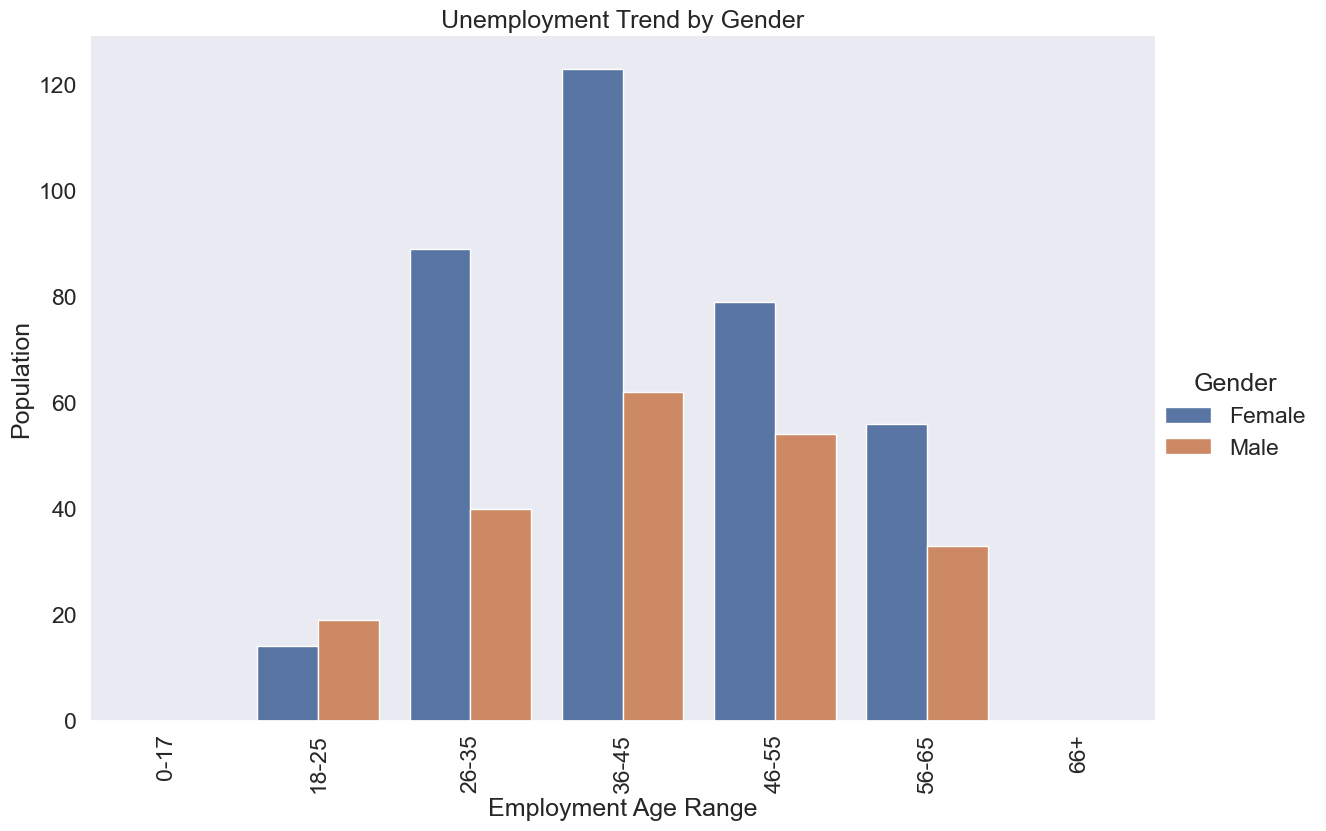

In [59]:
#plotting unemployment by gender
sns.set_style("whitegrid")
sns.set(font_scale=1.5)

unemp_gen = sns.catplot(data=unemployment_gender, kind="count", x="Employment Age Range", hue="Gender", height=8, aspect=1.5)
plt.xticks(rotation=90)
plt.ylabel('Population')
plt.title('Unemployment Trend by Gender')
unemp_gen.ax.grid(False) 
plt.show()
unemp_gen.savefig("Unemployment by Gender.png")
#Galli (2018)

In [60]:
# cross tabulation of employment by gender
ct = pd.crosstab(unemployment_gender['Employment Age Range'], unemployment_gender['Gender'])
ct_pct = ct.apply(lambda r: r/r.sum(), axis=1) * 100
ct_pct = ct_pct.round(2)
print(ct_pct)
#deepanshu_rustagi (2020)

Gender                Female   Male
Employment Age Range               
18-25                  42.42  57.58
26-35                  68.99  31.01
36-45                  66.49  33.51
46-55                  59.40  40.60
56-65                  62.92  37.08


### Finding what percentage of the workforce of Ages (15 - 65) are unemployed


In [61]:
# filtering out unemployed working age group
selected_rows = unemployment.loc[(unemployment["Age"] > 17) & (unemployment["Age"] <= 65) & (unemployment["Occupation"] == "Unemployed")]
total_rows = unemployment.loc[(unemployment["Age"] > 17) & (unemployment["Age"] <= 65)]

percentage = len(selected_rows) / len(total_rows) * 100
print("Percentage of the workforce that is unemployed is: {:.2f}%".format(percentage))

Percentage of the workforce that is unemployed is: 9.67%


### Unemployment Insights
The unemployment rate is relatively high at 9.67% of the entire labour force.
with the younger ages in the workforce having slightly higher unemployment rates. Also there is a higher number of unemployed females across most age bands, although that is also slightly influenced by having more females in the general population.

# Examining religious affiliations to see if there are any religions growing, or shrinking

In [62]:
# Getting to total number of people per religion and getting their percentage value of the population
data["Religion"].value_counts()
religion_counts = data["Religion"].value_counts()
religion_percentages = religion_counts / religion_counts.sum() * 100

religion_df = pd.concat([religion_counts, religion_percentages], axis=1)
religion_df.columns = ['Frequency', 'Percentage']

print(religion_df)

               Frequency  Percentage
None                3455   34.150440
Not Available       2544   25.145794
Christian           2135   21.103094
Catholic            1093   10.803598
Methodist            628    6.207374
Muslim               142    1.403578
Sikh                  69    0.682020
Jewish                47    0.464565
Agnostic               2    0.019769
Pagan                  1    0.009884
Bahai                  1    0.009884


### A suitable plot to read the religious trends would be a labelled heatmap which plots the various religions across different age groups and makes it easy to identify growing and shrinking numbers

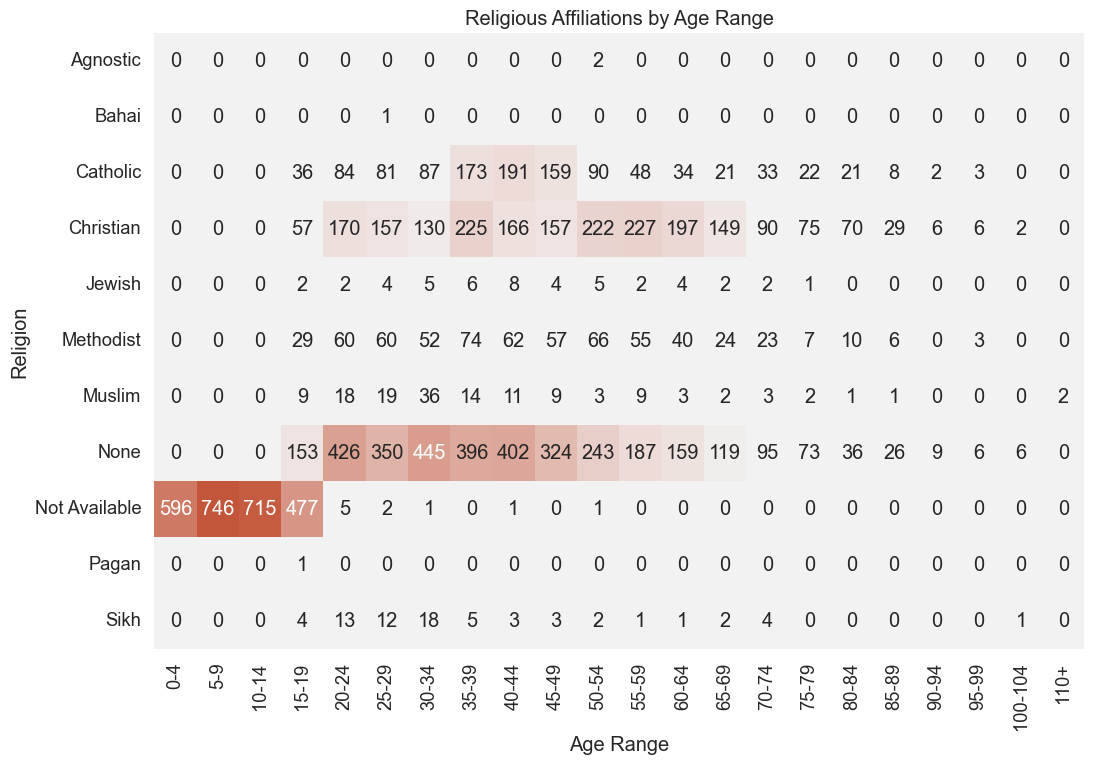

In [63]:
# creating a crosstab of Religion and Age range and plotting as a heatmap
xtab = pd.crosstab(index=data['Religion'], columns=data['Age Range'])

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

sns.set_style("whitegrid")
sns.set(font_scale=1.2)
plt.figure(figsize=(12,8))
sns.heatmap(xtab, cmap=cmap, annot=True, fmt="d", cbar=False, center=xtab.mean().mean())
plt.title("Religious Affiliations by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Religion")
plt.savefig('religion heatmap.png')
plt.show()

### Religious Insights
The count above shows that a quarter of the population (25%) are irreligious.
The plot also shows that the majority of our Nan values identified earlier belong to children(Minors) who probably have not found any religious bearings yet.
The plot reveals that while less than half of the entire population hold religious beliefs, most of them are christians, followed by Catholics and Methodists. There is a small population of Muslims, Sikh and Jewish people as well.
While there is a younger population for the Muslims and Sikh which could indicate a growing religion, their numbers are still really small against the dominant religions and the entire population.

# Examining the divorce and marriage rate


In [64]:
# Extracting the data for people above the legal marriage age into a df marital_age
marital_age = data[data['Age'] >= 18]
marital_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
0,1,Kaur Drive,Douglas,Adams,77,Head,Widowed,Male,Retired Museum education officer,None,Christian,75-79
1,2,Kaur Drive,Hollie,West,79,Head,Single,Female,Retired Dealer,None,Christian,75-79
2,3,Kaur Drive,Joseph,Hall,55,Head,Single,Male,Fast food restaurant manager,None,Christian,55-59
3,4,Kaur Drive,Gregory,Cox,35,Head,Single,Male,Housing manager/officer,None,None,35-39
4,5,Kaur Drive,Lydia,Jones,42,Head,Single,Female,Unemployed,None,Catholic,40-44
...,...,...,...,...,...,...,...,...,...,...,...,...
10107,1,St.John Haven,Jean,Johnson,50,Head,Single,Female,Science writer,None,Christian,50-54
10108,1,St.John Haven,Alex,Johnson,25,Son,Single,Male,Freight forwarder,None,Christian,25-29
10109,1,St.John Haven,Barry,Johnson,20,Son,Divorced,Male,University Student,None,Christian,20-24
10116,1,St.John Haven,Kate,Whitehead,51,Sibling,Single,Female,Food technologist,None,Christian,50-54


          Count  Frequency
Single     3738  48.971571
Married    2672  35.005895
Divorced    871  11.410979
Widowed     352   4.611555


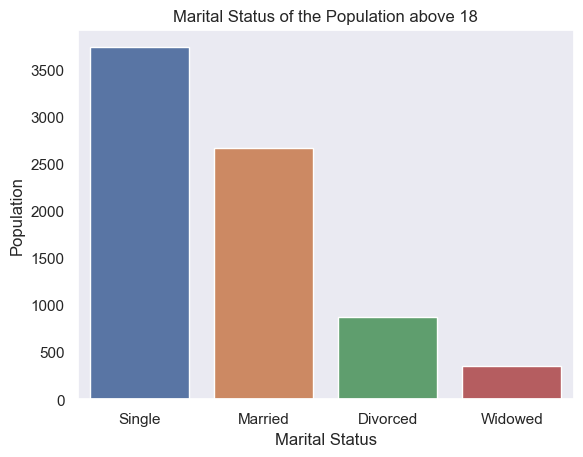

In [65]:
#Frequency distribution of the Marital status of the population and a plot of the population distribution
value_counts = marital_age["Marital Status"].value_counts()
frequency = marital_age["Marital Status"].value_counts(normalize=True) * 100
result = pd.concat([value_counts, frequency], axis=1, keys=['Count', 'Frequency'])
print(result)

sns.set(style="dark")
ax = sns.barplot(x=result.index, y="Count", data=result)
ax.set_title("Marital Status of the Population above 18")
ax.set_ylabel("Population")
ax.set_xlabel("Marital Status")
plt.show()

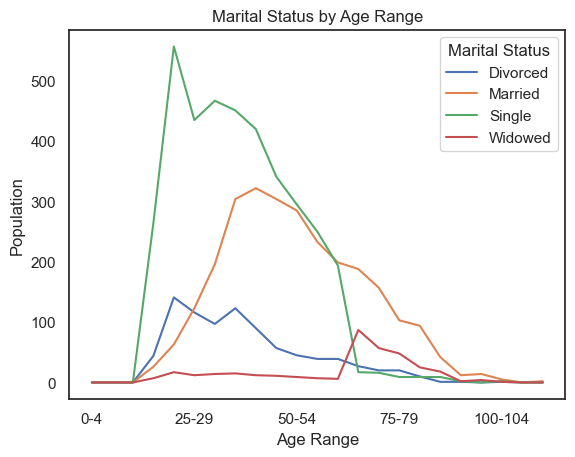

In [66]:
#Grouping the data, aggregating and plotting the marital status by age range
count_data = marital_age.groupby(['Age Range', 'Marital Status']).size().reset_index(name='Count')
table = pd.pivot_table(count_data, values='Count', index=['Age Range'], columns=['Marital Status'])

sns.set_style("white")
table.plot(kind='line')
plt.title('Marital Status by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Population')
plt.show()


##  Examining housing occupancy levels (how many people per house) and determining if existing housing is being under or over-used

### A subdata base including relevant columns would be created to allow the concatenating of the house number and street name into one column without affecting the original database,this would make it easier to do a count of people per address

In [67]:
occupancy = data[["House Number", "Street",'First Name', 'Surname', "Marital Status", "Relationship to Head of House", "Occupation" ]]
occupancy

,House Number,Street,First Name,Surname,Marital Status,Relationship to Head of House,Occupation
0,1,Kaur Drive,Douglas,Adams,Widowed,Head,Retired Museum education officer
1,2,Kaur Drive,Hollie,West,Single,Head,Retired Dealer
2,3,Kaur Drive,Joseph,Hall,Single,Head,Fast food restaurant manager
3,4,Kaur Drive,Gregory,Cox,Single,Head,Housing manager/officer
4,5,Kaur Drive,Lydia,Jones,Single,Head,Unemployed
...,...,...,...,...,...,...,...
10113,1,St.John Haven,Patrick,Morgan,Ineligible,Son,Student
10114,1,St.John Haven,Caroline,Morgan,Ineligible,Daughter,Student
10115,1,St.John Haven,Benjamin,Morgan,Ineligible,Son,Child
10116,1,St.John Haven,Kate,Whitehead,Single,Sibling,Food technologist


In [68]:
#converting the house number to a string value to enable combining the house number and street columns into one address column
occupancy['House Number'] = occupancy['House Number'].astype(str)
occupancy['Address'] = occupancy['House Number'] + ' ' + occupancy['Street']

In [69]:
#grouping by address to get household count
address_count = occupancy.groupby(['Address']).size().reset_index(name='count')

# getting household count after filtering out non relatives
to_drop = ["Visitor", "Lodger", "None"]
relatives = occupancy[~occupancy["Relationship to Head of House"].isin(to_drop)].copy()
relatives.reset_index(drop=True, inplace=True)
relatives_count = relatives.groupby(['Address']).size().reset_index(name='count')





### Plotting household numbers against household numbers excluding non-relatives

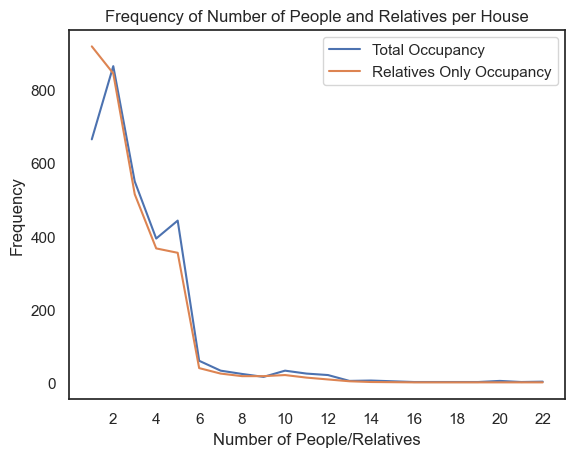

In [70]:
# plotting total household counts against household counts without non-relatives
ax = address_count['count'].value_counts().sort_index().plot(kind='line')
relatives_count['count'].value_counts().sort_index().plot(kind='line', ax=ax)

sns.set_style("white")
plt.xlabel('Number of People/Relatives')
plt.ylabel('Frequency')
plt.title('Frequency of Number of People and Relatives per House')
plt.xticks(range(2, max(address_count['count'].max(), relatives_count['count'].max()) + 2, 2))
plt.legend(['Total Occupancy', 'Relatives Only Occupancy'])
plt.show()


### Information on lodgers, visitors and no-relations in the town

In [71]:
# Getting lodger counts
lodgers = occupancy.loc[(occupancy["Relationship to Head of House"] == "Lodger")]
lodger_counts = lodgers.groupby("Address")["Relationship to Head of House"].count()
lodger_distribution = lodger_counts.value_counts()

# Getting unrelated dwellers counts
unrelated_dwellers = occupancy.loc[(occupancy["Relationship to Head of House"] == "None")]
unrelated_dwellers_counts = unrelated_dwellers.groupby("Address")["Relationship to Head of House"].count()
unrelated_dwellers_distribution = unrelated_dwellers_counts.value_counts()

# Getting visitor counts
visitors = occupancy.loc[(occupancy["Relationship to Head of House"] == "Visitor")]
visitor_counts = visitors.groupby("Address")["Relationship to Head of House"].count()
visitor_distribution = visitor_counts.value_counts()

#merging all three to be plotted
merged_df = pd.concat([lodger_distribution, visitor_distribution, unrelated_dwellers_distribution], axis=1)
merged_df.columns = ['lodgers', 'visitors', 'unrelated dwellers']



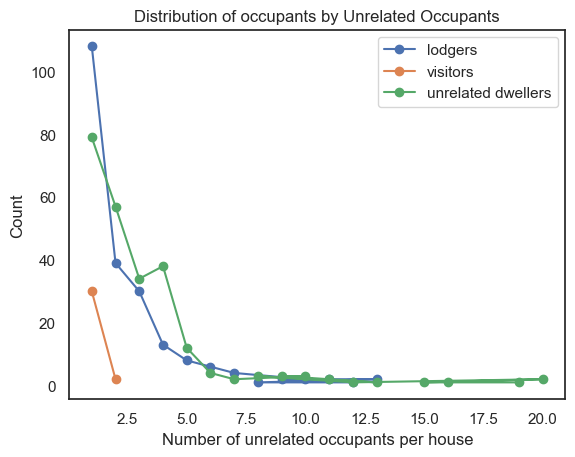

In [72]:
#plotting the merged data
merged_df.plot(kind='line', marker='o')

sns.set_style("white")
plt.xlabel('Number of unrelated occupants per house')
plt.ylabel('Count')
plt.title('Distribution of occupants by Unrelated Occupants')
plt.show()

### plotting two bars to show the the top 5 lodgers and top 5 residents with no relationship to the head of house

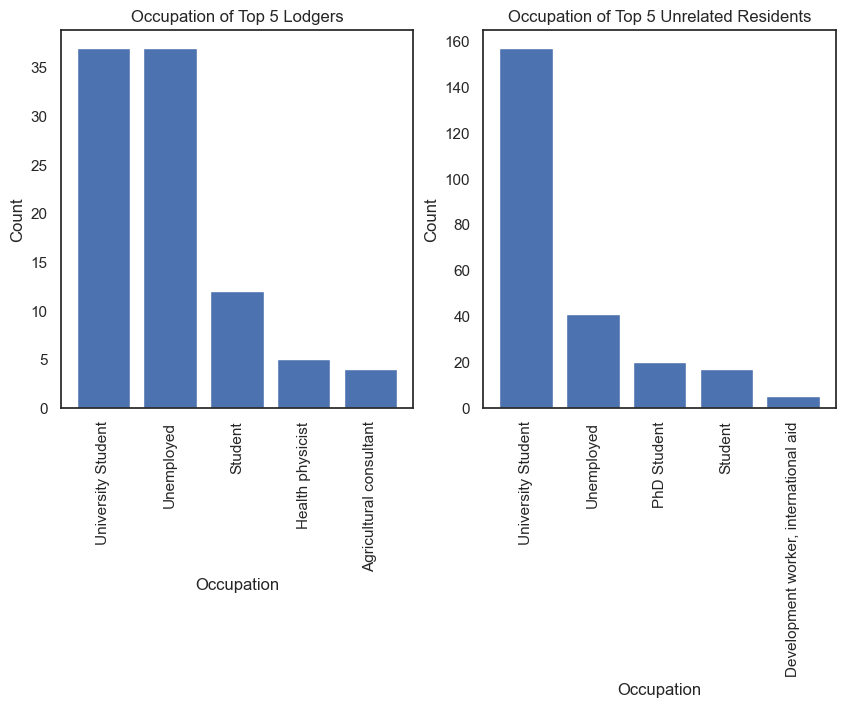

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# plot of top 5 lodger occupations
lodgers_occupation_counts = lodgers['Occupation'].value_counts()
ax[0].bar(lodgers_occupation_counts[:5].index, lodgers_occupation_counts[:5])
ax[0].set_xlabel('Occupation')
ax[0].set_ylabel('Count')
ax[0].set_title('Occupation of Top 5 Lodgers')
ax[0].set_xticklabels(lodgers_occupation_counts[:5].index, rotation=90)

# plot of top 5 unrelated to head of house occupations
unrelated_occupation = unrelated_dwellers['Occupation'].value_counts()
ax[1].bar(unrelated_occupation[:5].index, unrelated_occupation[:5])
ax[1].set_xlabel('Occupation')
ax[1].set_ylabel('Count')
ax[1].set_title('Occupation of Top 5 Unrelated Residents')
ax[1].set_xticklabels(unrelated_occupation[:5].index, rotation=90)


plt.subplots_adjust(bottom=0.25)
plt.show()


### Occupancy Insights
The highest occuring occupancy is 2 per house, but it is unclear whether that translates to more 2 bedroom houses or if the houses are just being under occupied, this value also changes to 1 occupant per house when unrelated occupants are removed. This is closely followed by 1 and 3 occupants per house. Some of the houses with larger number of occupants are because of lodgers and they are unique dwellings with House number 1 as indicated. The analysis also shows that a large number of the lodgers are University students, and also people with no relationship to head of house are also mostly university students

# Examining the number of university students. All of these are commuters since there are no universities in the town. Are there any other professions that are likely to be commuters?

In [74]:
#finding the number of university students
uni_students = data.loc[data["Occupation"].str.contains("university student", case=False)]
uni_students_total = len(uni_students)
print("The number of university students in the town is", uni_students_total)

The number of university students in the town is 669


### The given information provides very little about what is available in the town,only that there aren't any universities, and the need for an emergency centre suggests no hospital as well. As this is a modest town, it is also assumed there are no airports or military base. So it is assumed that doctors, surgeons, lecturers, professors, researchers, military and airline workers would commute out of town 

In [75]:
commuters = data.loc[~data["Occupation"].str.contains("retired", case=False) & data["Occupation"].str.contains("university|doctor|pilot|professor|lecturer|medical|surgeon|pilot|airline|army|armed|research", case=False)]
likely_commuters = len(commuters)
total_pop = len(data)
percentage_commuters = (likely_commuters/total_pop)*100
print("The number of likely commuters out of the town is", likely_commuters)
print("The percentage of likely commuters out of town is ", percentage_commuters )

The number of likely commuters out of the town is 1071
The percentage of likely commuters out of town is  10.586142136997132


### COMMUTER INSIGHTS
The data along with the assumptions suggest that 10.5 % of the population commutes

 # What is the birth rate and death rate for the town? 

### Beacuse of the lack of historical data as this is limited to just the census data of the year, it is difficult to get a good birth and death rate for the town. But i would consider those born in the last year as live births for estimating birth rate, and also consider depreciation in 5 year age bands of the population above 65 for the death rate estimate. Limitations of this method would be discussed in the limitations section of report

In [76]:
# live births is assumed to be children who haven't reached their first birthday, i.e born within the last year
birth_data = data[data['Age'] == 0]
num_live_births = len(birth_data)
birth_rate = (num_live_births / len(data)) * 1000

print("The current birth rate per 1000: {:.2f}".format(birth_rate))

The current birth rate per 1000: 10.87


In [77]:
#birth rate two years prior with slight adjustment for total population
birth_data1 = data[data['Age'] == 4]
num_live_births1 = len(birth_data1)
birth_rate1 = (num_live_births1 / (len(data)-631)) * 1000

print("The birth rate 5 years ago per 1000: {:.2f}".format(birth_rate1))

The birth rate 5 years ago per 1000: 13.81


## Death Rate

In [78]:
# summation of the difference in age bands across ages above 65
total_population = len(data)
d1 = data[data["Age Range"] == '65-69'] ["Age Range"].count()
d2 = data[data["Age Range"] == '70-74'] ["Age Range"].count()
d3 = data[data["Age Range"] == '75-79'] ["Age Range"].count()
d4 = data[data["Age Range"] == '80-84'] ["Age Range"].count()
d5 = data[data["Age Range"] == '85-89'] ["Age Range"].count()
d6 = data[data["Age Range"] == '90-94'] ["Age Range"].count()
d7 = data[data["Age Range"] == '95-99'] ["Age Range"].count()
d8 = data[data["Age Range"] == '100+'] ["Age Range"].count()

In [79]:
decline = ((d1-d2)+(d2-d3)+(d3-d4)+(d4-d5)+(d5-d6)+(d6-d7)+(d7-d8))/5
death_rate = (decline/total_population) * 1000
print("Death rate per 1000: {:.2f}".format(death_rate))

Death rate per 1000: 6.31


### Insights into Birth and Death rate for the town
The current birth rate for the town is estimated at 10.87, previous birth rate at 13.81, indicating a decline of 3 children per 1000 over 5 years
The death rate for the town is estimated at 6.31 per 1000 people.
It is acknowleged that these results are only an estimated calculation as the data set provides no information on migration as well, which could also be a determining factor of the values assessed.

# REFERENCES

### Deepanshu_rustagi (2020) pandas.crosstab() function in Python. Available online: https://www.geeksforgeeks.org/pandas-crosstab-function-in-python/ [Accessed 26/04/2023]

### Gov.uk (2023) Legal age of marriage in England and Wales rises to 18. Available Online: https://www.gov.uk/government/news/legal-age-of-marriage-in-england-and-wales-rises-to-18 [Accessed 26/04/2023]

### Josh (2015)Trying to create grouped variable in python. Available online: https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python [Accessed 26/04/2023]

### Keith Galli (2018) Complete Python Pandas Data Science Tutorial! (Reading CSV/Excel files, Sorting, Filtering, Groupby). Available online: https://www.youtube.com/watch?v=vmEHCJofslg&t=2260s

### Keith Galli (2019) Intro to Data Visualization in Python with Matplotlib! (line graph, bar chart, title, labels, size)). Available online: https://www.youtube.com/watch?v=DAQNHzOcO5A&t=1090s

### Marco Mariani (2020) How to build a population pyramid with python. Available online: https://stackoverflow.com/questions/60969101/how-to-build-a-population-pyramid-with-python [Accessed 26/04/2023]